In [1]:
import matplotlib as mpl, pandas as pd, numpy as np, geopandas as gpd, matplotlib.pyplot as plt, pingouin as pin
import networkx as nx

from math import sqrt
import pylab
import ast

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:20.2f}'.format

import ABManalysis as af
import cityImage as ci
import gisVis as gv
import importlib


## 1. Loading Data
#### *Coordinate System of the case study area for cartographic visualisations*

In [2]:
# initialise path, names, etc.
city_name = 'UPB'
epsg = 4326
crs = 'EPSG:'+str(epsg)

In [3]:
input_path = 'Input/empiricalABM/'
output_path = 'Outputs/empiricalABM/'

edges = gpd.read_file(input_path+'edges.shp', driver='ESRI Shapefile')
nodes = gpd.read_file(input_path+'nodes.shp', driver='ESRI Shapefile')

nodes.index, edges.index = nodes.nodeID, edges.edgeID
nodes.index.name, edges.index.name = None, None

### 1.1 Loading  the simulation's volumes and assigning them to the segments of the street network

In [4]:
summary_clusters = pd.read_csv(input_path+'clusters_71.csv', index_col = 0)
clusters = ['GROUP1', 'GROUP2', 'GROUP3']
configurations = ['NULLGROUP', 'POPULATION', 'HETERO']
columns = ['edgeID'] + summary_clusters.index.to_list() + ['HETERO']
runs = 20

# creating a list of dataframes, one dataframe per each run containing the street segments' volumes
df_list = []
for run in range(runs):
    # change the file name to the current date
    df_tmp = pd.read_csv(input_path+'streetVolumes/20240507_'+str(run)+'.csv')
    df_tmp['HETERO'] = df_tmp[clusters].sum(axis=1)
    for n, c in enumerate(columns): 
        df_tmp.rename(columns={c: columns[n]+"_"+str(run)}, inplace=True)
    df_list.append(df_tmp)

    
df = pd.concat(df_list, axis = 1)
df['edgeID'] = df.edgeID_0
for run in range(runs): 
    df.drop(['edgeID'+"_"+str(run)], axis = 1, inplace = True)

# creating a list of only 3 dataframes, one per configuration, from the previous list of dataframes
cf_df_list = []
for configuration in configurations: 
    cf_df_list.append(df[[col for col in df if col.startswith(configuration)]+['edgeID']])

In [5]:
print('Configuration 1 DF')
cf_df_list[0].head(68)

Configuration 1 DF


,NULLGROUP_0,NULLGROUP_1,NULLGROUP_2,NULLGROUP_3,NULLGROUP_4,NULLGROUP_5,NULLGROUP_6,NULLGROUP_7,NULLGROUP_8,NULLGROUP_9,...,NULLGROUP_11,NULLGROUP_12,NULLGROUP_13,NULLGROUP_14,NULLGROUP_15,NULLGROUP_16,NULLGROUP_17,NULLGROUP_18,NULLGROUP_19,edgeID
0,64,75,78,54,70,60,69,68,67,60,...,65,65,66,64,81,69,70,63,61,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,24,31,32,31,31,34,27,30,27,29,...,29,19,24,26,18,24,23,21,19,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,12,18,13,21,17,18,15,19,18,16,...,13,18,18,18,17,18,19,21,22,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,29,22,17,19,16,17,24,13,24,19,...,10,30,12,23,19,25,16,24,25,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,29,22,17,19,16,17,24,13,24,19,...,10,30,12,23,19,25,16,24,25,9


In [6]:
print('Configuration 2 DF')
cf_df_list[1].head(68)

Configuration 2 DF


,POPULATION_0,POPULATION_1,POPULATION_2,POPULATION_3,POPULATION_4,POPULATION_5,POPULATION_6,POPULATION_7,POPULATION_8,POPULATION_9,...,POPULATION_11,POPULATION_12,POPULATION_13,POPULATION_14,POPULATION_15,POPULATION_16,POPULATION_17,POPULATION_18,POPULATION_19,edgeID
0,50,54,39,44,48,53,45,51,57,48,...,47,57,60,66,68,55,55,51,52,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,62,65,56,62,54,64,56,51,65,67,...,68,55,58,54,50,58,52,62,55,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,6,11,13,9,12,9,15,7,9,9,...,10,9,11,8,4,18,7,9,11,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
print('Configuration 3 DF')
cf_df_list[2].head(68)

Configuration 3 DF


,HETERO_0,HETERO_1,HETERO_2,HETERO_3,HETERO_4,HETERO_5,HETERO_6,HETERO_7,HETERO_8,HETERO_9,...,HETERO_11,HETERO_12,HETERO_13,HETERO_14,HETERO_15,HETERO_16,HETERO_17,HETERO_18,HETERO_19,edgeID
0,60,64,61,47,55,49,51,64,56,51,...,46,56,55,60,64,56,51,42,57,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,61,62,56,56,69,58,68,57,54,62,...,63,58,49,49,47,52,56,63,55,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,5,11,15,11,7,7,5,11,15,10,...,6,11,10,12,7,10,10,11,5,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### 1.2 Computing the volumes per group/agent typology (Heterogeneous configuration)

In [8]:
# repeating the procedure but only considering the heterogeneous configuration, and differentiate the volumes by cluster
columns = ['edgeID'] + clusters
runs = 20

# creating a list of dataframes, one dataframe per each run containing the street segments' volumes
df_list_clusters = []
for run in range(runs):
    # change the file name to the current date
    df_tmp = pd.read_csv(input_path+'streetVolumes/20240507_'+str(run)+'.csv')
    for n, c in enumerate(columns): 
        df_tmp.rename(columns={c: columns[n]+"_"+str(run)}, inplace=True)
    df_list_clusters.append(df_tmp)
    
df = pd.concat(df_list, axis = 1)
df['edgeID'] = df.edgeID_0
for run in range(runs): 
    df.drop(['edgeID'+"_"+str(run)], axis = 1, inplace = True)

# creating a list of only 3 dataframes, one per configuration, from the previous list of dataframes
cf_df_list_clusters = []
for cluster in clusters: 
    cf_df_list_clusters.append(df[[col for col in df if col.startswith(cluster)]+['edgeID']])

In [9]:
# aggregate the runs' values
edges = af.aggregate_runs(cf_df_list, configurations, edges, ddof = 0)
edges = af.aggregate_runs(cf_df_list_clusters, clusters, edges, ddof = 0)

### 1.3 Computing *p_values* to assess to what extent the homogeneous and heterogeneous configurations produce different results from the null configuration

In [10]:
# getting again the volumes from each run
df = pd.concat(df_list, axis = 1)
df['edgeID'] = df.edgeID_0
for run in range(runs): 
    df.drop(['edgeID'+"_"+str(run)], axis = 1, inplace = True)

In [11]:
labels = ['null', 'homogeneous', 'heterogeneous']
edges_list = list(edges['edgeID'])

# creating a list of dataframes. Each dataframe represents a street segment. It contains the volumes of each run, 
# per each configuration
df_edges = []
for edge in edges_list:
    df_tmp = pd.DataFrame(columns=['value','configuration'])
    
    for n, df in enumerate(df_list):
        df = df.copy()
        df.index = df['edgeID_'+str(n)]
        row = df.loc[edge]
        values = [row['NULLGROUP_'+str(n)], row['POPULATION_'+str(n)], row['HETERO_'+str(n)]]
        for nn, value in enumerate(values):  
            df_tmp.loc[-1] = [value, labels[nn]]
            df_tmp.index = df_tmp.index + 1
            
    df_tmp['value'] = df_tmp['value'].astype(int)
    df_edges.append(df_tmp)

In [12]:
print("Example of a street segment's df (3 configurations x 20 runs = 60 values)")
df_edges[0].head(69)

Example of a street segment's df (3 configurations x 20 runs = 60 values)


,value,configuration
59,64,null
58,50,homogeneous
57,60,heterogeneous
56,75,null
55,54,homogeneous
54,64,heterogeneous
53,78,null
52,39,homogeneous
51,61,heterogeneous
50,54,null


In [13]:
edges['null_pvalue'] = 0.000
edges['hetero_pvalue'] = 0.000
edges['homo_pvalue'] = 0.000
edges['homo_pvalue_cl'] = "No significant diff."
edges['hetero_pvalue_cl'] = "No significant diff."

# performing wilcoxon test per each edge and 
for n, df_edge in enumerate(df_edges):
    x = df_edge[df_edge['configuration'] == 'null']['value'].to_list()
    y = df_edge[df_edge['configuration'] == 'heterogeneous']['value'].to_list()
    z = df_edge[df_edge['configuration'] == 'homogeneous']['value'].to_list()

    # null vs heterogeneous
    if x != y:
        hetero = pin.wilcoxon(x = x, y = y, alternative='two-sided')
        hetero_pvalue = hetero.iloc[0]['p-val']
    else:
        hetero_pvalue = 1.0
    
    # null vs homogeneous
    if x != z:
        homo = pin.wilcoxon(x = x, y = z, alternative='two-sided')
        homo_pvalue = homo.iloc[0]['p-val']
    else:
        homo_pvalue = 1.0
    
    # assigning the result to the edges gdf
    edge = edges_list[n]
    edges.at[edge, 'hetero_pvalue'] = hetero_pvalue
    edges.at[edge, 'homo_pvalue'] = homo_pvalue
    
    if edges.loc[edge]['hetero_pvalue'] <= 0.05:
        if edges.loc[edge]['hetero_pvalue'] > edges.loc[edge]['null_pvalue']:
            color_hetero = "Significant diff. (+)"
        else:
            color_hetero = "Significant diff. (-)"
        edges.at[edge, 'hetero_pvalue_cl'] = color_hetero
            
    if edges.loc[edge]['homo_pvalue'] <= 0.05:
        if edges.loc[edge]['POPULATION'] > edges.loc[edge]['null_pvalue']:
            color_homo = "Significant diff. (+)"      
        else:
            color_homo = "Significant diff. (-)"
        edges.at[edge, 'homo_pvalue_cl'] = color_homo

In [14]:
## Saving volumes
edges.to_file(output_path+'pedSim_empirical_71.shp', driver='ESRI Shapefile')

### 1.2 Loading the simulation's individual routes

In [15]:
## reloading routes if already processed
#routes_gdfs = []
#n = 1
#for n, configuration in enumerate(configurations):
#    routes_gdf = gpd.read_file(output_path+'_'+configuration+'_routes.shp', driver='ESRI Shapefile')
#    routes_gdf = gpd.read_file(output_path+'routes/20240507_'+str(n)+'.shp', driver='ESRI Shapefile')
#    routes_gdf['edgeIDs'] = routes_gdf.apply(lambda row: af.get_edgesID(row, routes_gdf.columns), axis = 1)
#    routes_gdfs.append(routes_gdf)

In [16]:
# or processing them from the simulation output
input_path_routes = 'Input/empiricalABM/routes/'
routes_gdfs = []

for run in range(runs):
    # change the file name to the current date
    run_gdf = gpd.read_file(input_path_routes+'20240507_'+str(run)+'.shp')
    run_gdf.set_crs(crs)
    
    for n, configuration in enumerate(configurations):
        if configuration == 'HETERO':
            configuration_gdf = run_gdf[run_gdf.group.isin(clusters)].copy()
        else:
            configuration_gdf = run_gdf[run_gdf.group == configuration].copy()
        if run == 0:
            routes_gdf = configuration_gdf.copy()
            routes_gdfs.append(configuration_gdf)
            continue
        
        routes_gdf = routes_gdfs[n].copy()
        routes_gdf = routes_gdf.append(configuration_gdf)
        routes_gdf.reset_index(inplace = True, drop=True)
        routes_gdf = routes_gdf.where(pd.notnull(routes_gdf), None)
        routes_gdf.replace({"None":None}, inplace = True)
        routes_gdfs[n] = routes_gdf

In [17]:
# preparing the routes gdf
for n, configuration in enumerate(configurations): 
    #routes_gdf = routes_gdfs[n].copy()
    routes_gdf['edgeIDs'] = routes_gdf.apply(lambda row: af.get_edgesID(row, routes_gdf.columns), axis=1)
    routes_gdf['O'] = routes_gdf['O'].astype(int)
    routes_gdf['D'] = routes_gdf['D'].astype(int)
    routes_gdfs[n] = routes_gdf

## 2. Route statistics
### 2.1 Deviation from the road-distance shortest path

In [18]:
## computing the deviation from the road-distance shortest path

#graph = ci.graph_fromGDF(nodes, edges, nodeID = "nodeID")
#distances = {}
#routes_gdf = routes_gdfs[0].copy()
#for routes_gdf in routes_gdfs:
#    for row in routes_gdf.itertuples():
#        source = routes_gdf.loc[row[0]]['O']
#        target = routes_gdf.loc[row[0]]['D']
#        if str(source)+"-"+str(target) in distances:
#            continue
        
#        distance = nx.shortest_path_length(graph, source=source, target=target, weight='length', method='dijkstra')
#        distances[str(source)+"-"+str(target)] = distance

#####
graph = ci.graph_fromGDF(nodes, edges, nodeID="nodeID")
distances = {}

for sources_gdf in routes_gdfs:
    for row in sources_gdf.itertuples():
        source = sources_gdf.loc[row[0]]['O']
        target = sources_gdf.loc[row[0]]['D']
        if str(source) + "-" + str(target) in distances:
            continue

        if not nx.has_path(graph, source, target):
            distance = float('0')
            # Or set a default value of your choice
            # distance = 1000000  # Example
        else:
            try:
                distance = nx.shortest_path_length(graph, source=source, target=target, weight='length', method='dijkstra')
            except KeyError:
                distance = float('0')

        distances[str(source) + "-" + str(target)] = distance

#### Basic route statistics per configuration

In [19]:
labels = ['null', 'homogeneous', 'heterogeneous']
for n, configuration in enumerate(configurations):

    routes_gdf = routes_gdfs[n].copy()
    print()
    print("Within the", labels[n], "configuration:")
    print("median routes' length:", round(routes_gdf.geometry.length.median(),3))
    print("mean routes' length:", round(routes_gdf.geometry.length.mean(),3))
    routes_gdf['sp_dist'] = routes_gdf.apply(lambda row: distances[str(row['O'])+"-"+str(row['D'])], axis = 1)
    routes_gdf['sp_dev'] = routes_gdf.geometry.length/routes_gdf['sp_dist']
    print("median routes' deviation from SP", round(routes_gdf['sp_dev'].median(),3))
    routes_gdfs[n] = routes_gdf


Within the null configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within the homogeneous configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within the heterogeneous configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0


In [20]:
labels = ['null', 'homogeneous', 'heterogeneous']
for n, configuration in enumerate(configurations):

    routes_gdf = routes_gdfs[n].copy()
    print()
    print("Within the", labels[n], "configuration:")
    print("median routes' length:", round(routes_gdf.geometry.length.median(),3))
    print("mean routes' length:", round(routes_gdf.geometry.length.mean(),3))
    routes_gdf['sp_dist'] = routes_gdf.apply(lambda row: distances[str(row['O'])+"-"+str(row['D'])], axis = 1)
    routes_gdf['sp_dev'] = routes_gdf.geometry.length/routes_gdf['sp_dist']
    print("median routes' deviation from SP", round(routes_gdf['sp_dev'].median(),3))
    routes_gdfs[n] = routes_gdf


Within the null configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within the homogeneous configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within the heterogeneous configuration:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0


#### Basic route statistics per group

In [21]:
for cluster in list(clusters):
    tmp = routes_gdf[routes_gdf.group == cluster].copy()
    print()
    print("Within", cluster+":")
    print("median routes' length:", round(tmp.geometry.length.median(),3))
    print("mean routes' length:", round(tmp.geometry.length.mean(),3))
    tmp['sp_dist'] = tmp.apply(lambda row: distances[str(row['O'])+"-"+str(row['D'])], axis = 1)
    tmp['sp_dev'] = tmp.geometry.length/tmp['sp_dist']
    print("median routes' deviation from SP", round(tmp['sp_dev'].median(),3))


Within GROUP1:
median routes' length: 0.003
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within GROUP2:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0

Within GROUP3:
median routes' length: 0.002
mean routes' length: 0.002
median routes' deviation from SP 1.0


### 2.2 Elements usage

#### Elements usage per configuration

In [22]:
variables = ['barrier', 'routeMark', 'regions', 'distant']

for n, configuration in enumerate(configurations):
    print()
    print("Within the", labels[n], "configuration:")
    for variable in variables:
        l = len(routes_gdfs[n])
        print(variable, str(round(len(routes_gdfs[n][(routes_gdfs[n][variable] == 1)])/l*100,2))+"%")
    
    routes_gdfs[n]["using"] = routes_gdfs[n].barrier +routes_gdfs[n].routeMark + routes_gdfs[n].regions + routes_gdfs[n].distant
    print("using elements", str(round(len(routes_gdfs[n][(routes_gdfs[n]["using"] > 0)])/l*100,2))+"%")
    print("severing", round(routes_gdfs[n].severing.mean(),3))
    print("natural",  round(routes_gdfs[n].natural.mean(),3))


Within the null configuration:
barrier 22.31%
routeMark 7.78%
regions 0.0%
distant 0.0%
using elements 30.09%
severing 4.391
natural 3.589

Within the homogeneous configuration:
barrier 22.31%
routeMark 7.78%
regions 0.0%
distant 0.0%
using elements 30.09%
severing 4.391
natural 3.589

Within the heterogeneous configuration:
barrier 22.31%
routeMark 7.78%
regions 0.0%
distant 0.0%
using elements 30.09%
severing 4.391
natural 3.589


#### Elements usage per group

In [23]:
for cluster in clusters:
    print()
    print("Within", cluster+":")
    tmp = routes_gdfs[2][routes_gdfs[2].group == cluster].copy()
    l = len(tmp)
    for variable in variables:
        print(variable, str(round(len(tmp[tmp[variable] == 1])/l*100,2)) +"%")
    
    tmp["using"] = tmp.barrier +tmp.routeMark + tmp.regions + tmp.distant
    print("using elements", str(round(len(tmp[tmp["using"] > 0])/l*100,2))+"%")
    print("severing", round(tmp.severing.mean(),3))
    print("natural",  round(tmp.natural.mean(),3))


Within GROUP1:
barrier 22.11%
routeMark 3.95%
regions 0.0%
distant 0.0%
using elements 26.07%
severing 4.524
natural 3.728

Within GROUP2:
barrier 20.09%
routeMark 11.82%
regions 0.0%
distant 0.0%
using elements 31.91%
severing 4.137
natural 3.274

Within GROUP3:
barrier 24.85%
routeMark 17.31%
regions 0.0%
distant 0.0%
using elements 42.15%
severing 4.155
natural 3.385


In [24]:
# export the routes
for n, configuration in enumerate(configurations):
    routes_gdfs[n].drop(['edgeIDs'], axis = 1, errors = 'ignore').to_file(
        output_path+configuration+'_routes.shp', driver='ESRI Shapefile')

## 3. Volumes

              NULLGROUP
0                 66.50
1                  0.00
2                  0.00
3                 26.50
4                  0.00
5                 18.00
6                  0.00
7                 19.50
8                  0.00
9                 19.50
10                 0.00
11                 0.00
12               127.50
13               127.50
14               109.00
15                83.50
16                 0.00
17                18.00
18                 0.00
19                 0.00
20                26.50
21                13.50
22                60.00
23               225.00
24                 0.00
25                 0.00
26                 4.50
27                43.00
28                 4.50
29               212.50
30                46.00
31               165.00
32                 4.50
33                22.50
34                 0.00
35                 0.00
36               340.00
37                19.50
38                19.50
39                19.50
40              

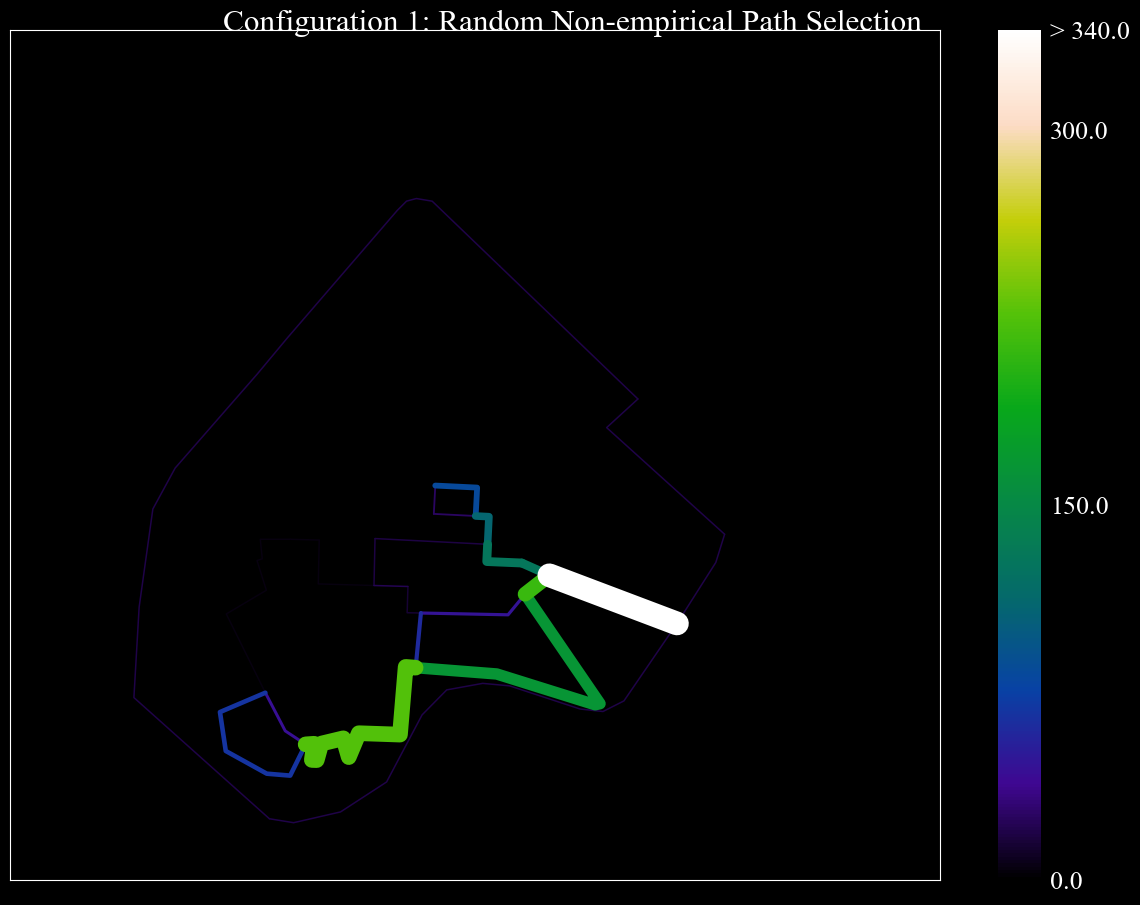

In [25]:
subtitles = ['Configuration 1: Random Non-empirical Path Selection']
norm = mpl.colors.Normalize(vmin = 0, vmax = 340)
fig = gv.plot_gdf(edges, column = configurations[0], cmap = gv.kindlmann(), norm = norm, title = subtitles[0], figsize = (15,10),
                  legend = False, cbar = True, cbar_ticks = 3, cbar_max_symbol = True, cbar_shrinkage = 1.0,
                  geometry_size_factor = 0.05, axes_frame = True)

# Create a tabular representation of the graph
column = configurations[0]
edges_config = edges[[column]]
df = pd.DataFrame(edges_config)
print(df.head(47))

             POPULATION
0                 51.50
1                  0.00
2                  0.00
3                 57.00
4                  0.00
5                  9.00
6                  0.00
7                  0.00
8                  0.00
9                  0.00
10                 0.00
11                 0.00
12               118.50
13               118.50
14               109.00
15                51.00
16                 0.00
17                 9.00
18                 0.00
19                 0.00
20                57.00
21                 9.00
22               124.00
23               231.00
24                 0.00
25                 0.00
26                 0.00
27                60.50
28                 0.00
29               221.50
30               113.50
31               106.50
32                 0.00
33                 9.00
34                 0.00
35                 0.00
36               340.00
37                 0.00
38                 0.00
39                 0.00
40              

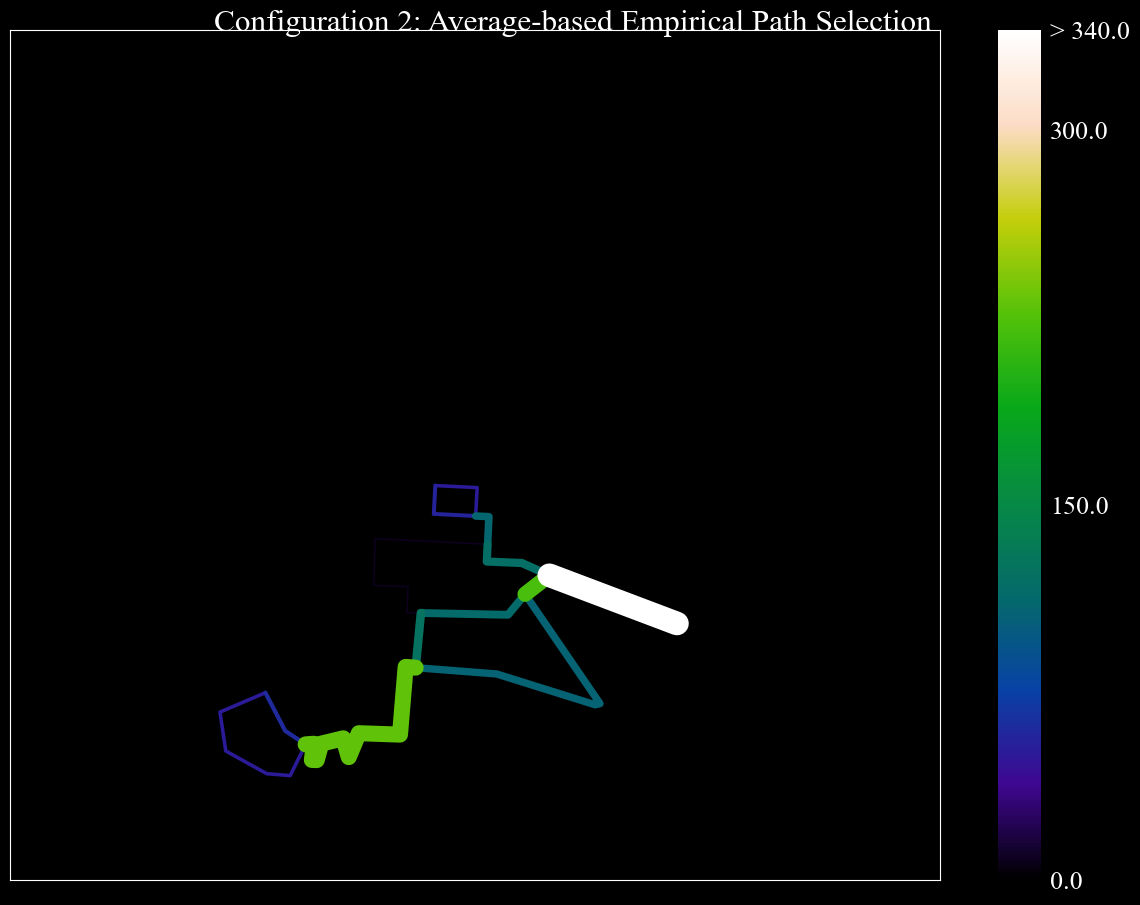

In [26]:
subtitles = ['Configuration 2: Average-based Empirical Path Selection']
norm = mpl.colors.Normalize(vmin = 0, vmax = 340)
fig = gv.plot_gdf(edges, column = configurations[1], cmap = gv.kindlmann(), norm = norm, title = subtitles[0], figsize = (15,10),
                  legend = False, cbar = True, cbar_ticks = 3, cbar_max_symbol = True, cbar_shrinkage = 1.0,
                  geometry_size_factor = 0.05, axes_frame = True)

# Create a tabular representation of the graph
column = configurations[1]
edges_config = edges[[column]]
df = pd.DataFrame(edges_config)
print(df.head(47))

                 HETERO
0                 55.50
1                  0.00
2                  0.00
3                 56.50
4                  0.00
5                 10.00
6                  0.00
7                  0.00
8                  0.00
9                  0.00
10                 0.00
11                 0.00
12               119.50
13               119.50
14               109.00
15                53.00
16                 0.00
17                10.00
18                 0.00
19                 0.00
20                56.50
21                10.00
22               121.50
23               231.00
24                 0.00
25                 0.00
26                 0.00
27                57.00
28                 0.00
29               220.50
30               111.00
31               110.00
32                 0.00
33                10.00
34                 0.00
35                 0.00
36               340.00
37                 0.00
38                 0.00
39                 0.00
40              

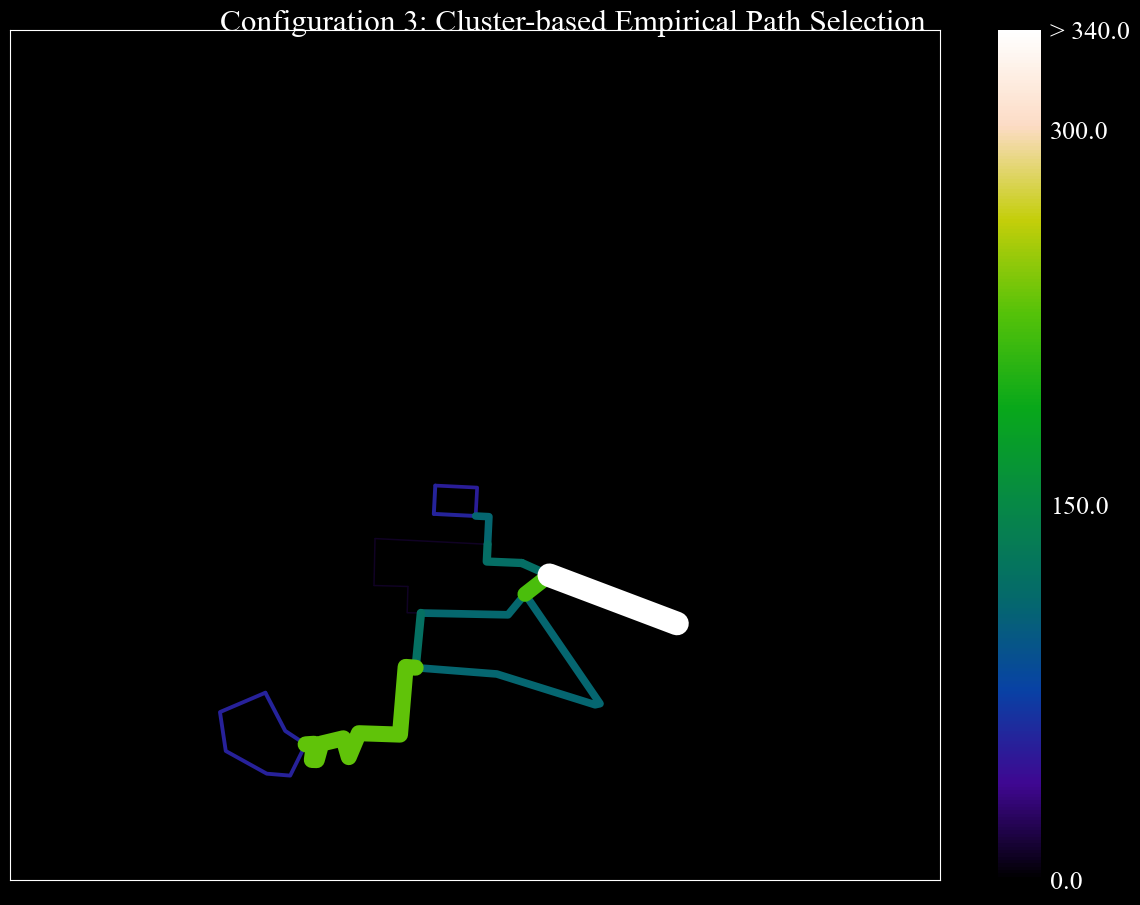

In [27]:
subtitles = ['Configuration 3: Cluster-based Empirical Path Selection']
norm = mpl.colors.Normalize(vmin = 0, vmax = 340)
fig = gv.plot_gdf(edges, column = configurations[2], cmap = gv.kindlmann(), norm = norm, title = subtitles[0], figsize = (15,10),
                  legend = False, cbar = True, cbar_ticks = 3, cbar_max_symbol = True, cbar_shrinkage = 1.0,
                  geometry_size_factor = 0.05, axes_frame = True)

# Create a tabular representation of the graph
column = configurations[2]
edges_config = edges[[column]]
df = pd.DataFrame(edges_config)
print(df.head(47))

In [28]:
fig.savefig("Outputs/Figures/empiricalABM/f6_71.pdf", bbox_inches='tight')

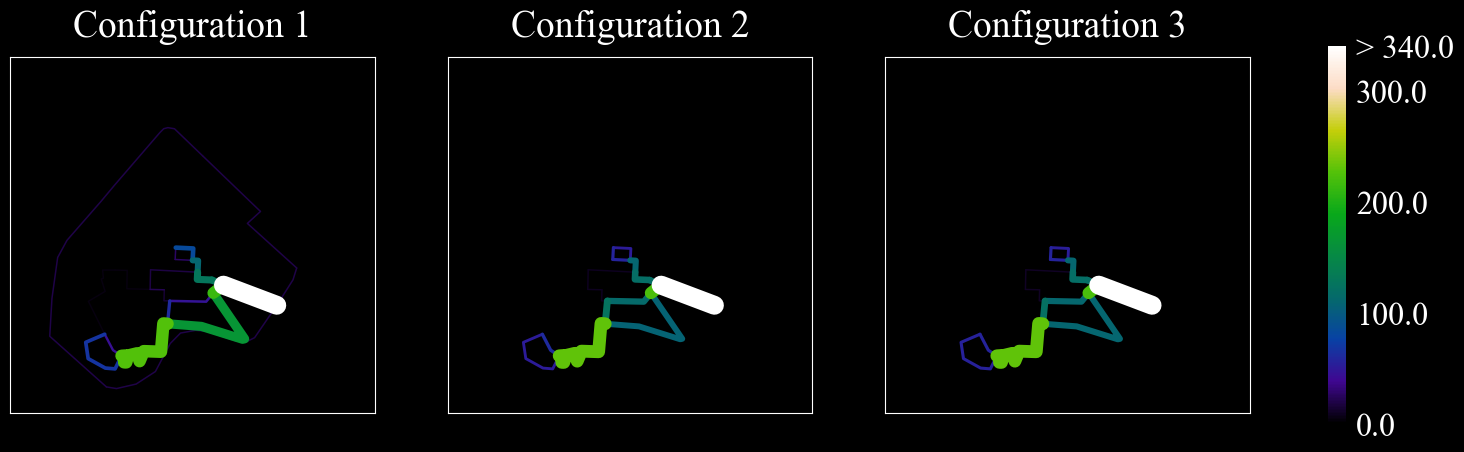

In [29]:
subtitles = [ 'Configuration 1', 'Configuration 2', 'Configuration 3',]
cols = ['null', 'homo', 'hetero']
norm = mpl.colors.Normalize(vmin = 0, vmax = 340)

fig = gv.plot_gdf_grid(edges, ncols = 3, figsize = (20, 7), columns = configurations, cmap = gv.kindlmann(), 
                       titles = subtitles, norm = norm, legend = False, cbar = True, cbar_ticks = 4, cbar_max_symbol = True, 
                       cbar_shrinkage = 0.70, geometry_size_factor = 0.04, axes_frame = True,  black_background = True)

               GROUP1_%             GROUP2_%             GROUP3_%
0                 17.73                16.36                11.54
1                  0.00                 0.00                 0.00
2                  0.00                 0.00                 0.00
3                 15.45                18.18                21.54
4                  0.00                 0.00                 0.00
5                  1.36                 3.64                 6.15
6                  0.00                 0.00                 0.00
7                  0.00                 0.00                 0.00
8                  0.00                 0.00                 0.00
9                  0.00                 0.00                 0.00
10                 0.00                 0.00                 0.00
11                 0.00                 0.00                 0.00
12                33.41                37.27                37.69
13                33.41                37.27                37.69
14        

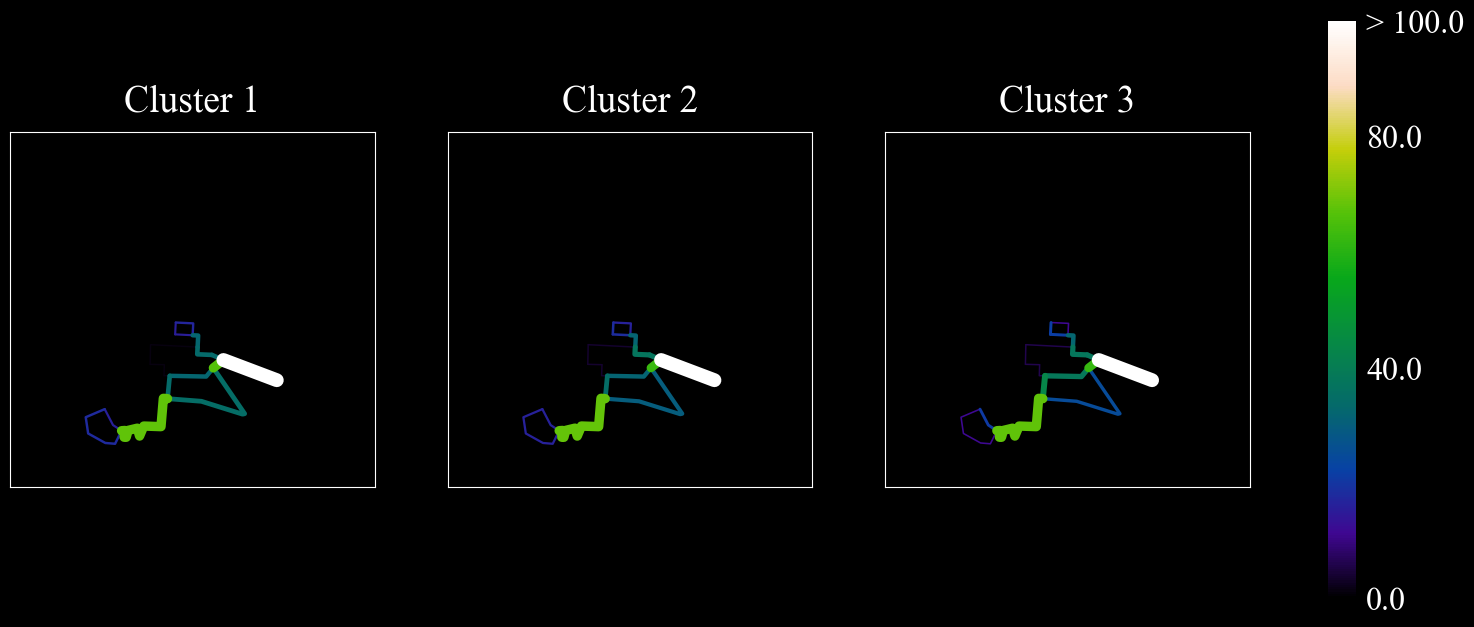

In [30]:
for cluster in clusters:
    edges[cluster+"_%"] = edges[cluster]/(68*summary_clusters.loc[cluster].portion*5)*100

columns = [cluster+"_%" for cluster in clusters]
titles = ['Cluster 1','Cluster 2','Cluster 3']

# Create a tabular representation of the graph
df = pd.DataFrame(edges, columns=columns)
print(df.head(47))

norm = mpl.colors.Normalize(vmin = 0, vmax = 100)
fig = gv.plot_gdf_grid(edges, ncols = 3, figsize = (20,10), columns = columns, titles = titles, cmap = gv.kindlmann(), 
                    norm = norm, legend = False, cbar = True, cbar_ticks = 3, cbar_max_symbol = True, 
                       geometry_size_factor = 0.10,  axes_frame = True,  black_background = True)

In [31]:
fig.savefig("Outputs/Figures/empiricalABM/f8_71.pdf", bbox_inches='tight')

## 3.1 Differences between configurations

In [32]:
importlib.reload(gv)

<module 'gisVis' from 'C:\\Users\\RNGM\\PedSimCity-EvaluationP2\\gisVis.py'>

             POPULATION            NULLGROUP               HETERO  \
0                 51.50                66.50                55.50   
1                  0.00                 0.00                 0.00   
2                  0.00                 0.00                 0.00   
3                 57.00                26.50                56.50   
4                  0.00                 0.00                 0.00   
5                  9.00                18.00                10.00   
6                  0.00                 0.00                 0.00   
7                  0.00                19.50                 0.00   
8                  0.00                 0.00                 0.00   
9                  0.00                19.50                 0.00   
10                 0.00                 0.00                 0.00   
11                 0.00                 0.00                 0.00   
12               118.50               127.50               119.50   
13               118.50           

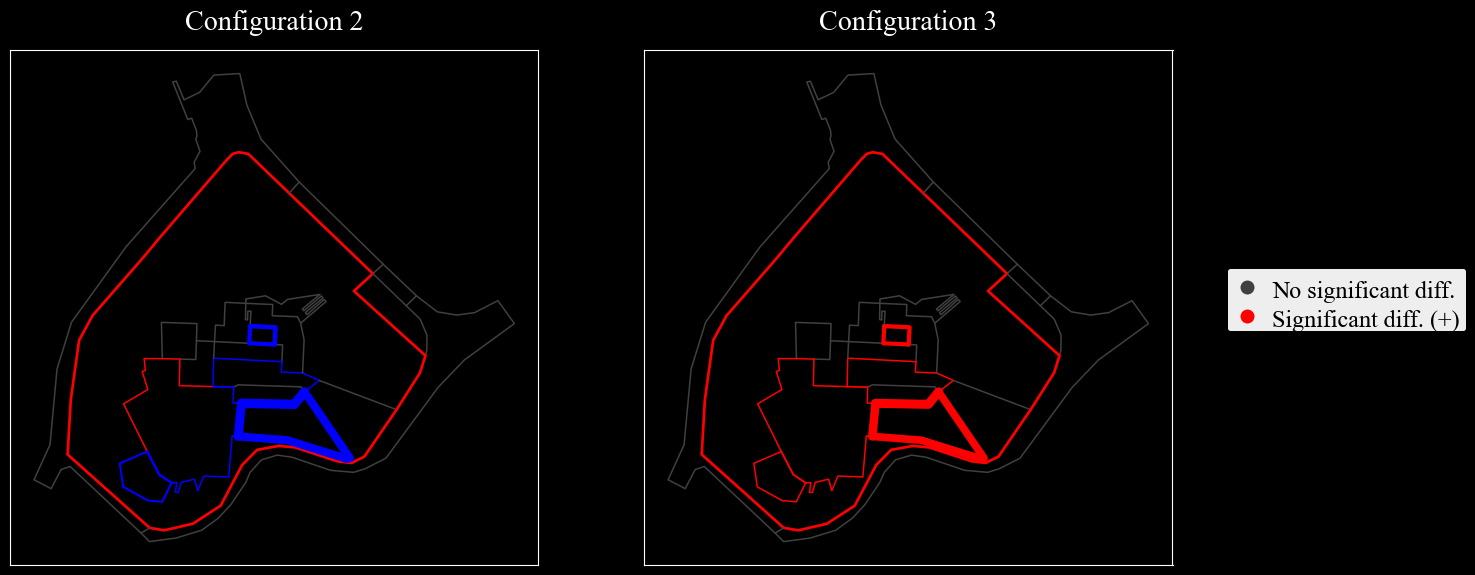

In [33]:
# building the colormap

from matplotlib.colors import LinearSegmentedColormap

black_l = gv.lighten_color('black', 0.75)
blue = gv.lighten_color('blue', 1.00)
red = gv.lighten_color('red', 1.00)
list_colors = [black_l, blue, red]

subtitles = ['Configuration 2', 'Configuration 3']
edges['homo_diff'] = abs(edges['POPULATION'] - edges['NULLGROUP'])
edges['hetero_diff'] = abs(edges['HETERO'] - edges['NULLGROUP'])

lw_columns = ['homo_diff', 'hetero_diff'] ## regulating line width
columns = ['homo_pvalue_cl', 'hetero_pvalue_cl']

cmap = LinearSegmentedColormap.from_list('custom_cmap', list_colors)
fig = gv.plot_gdf_grid(edges, columns = columns, classes = 5, cmap = cmap, titles = subtitles, legend = True, 
                       axes_frame = True, scheme = None, geometry_size_columns = lw_columns, 
                       geometry_size_factor = 0.10, black_background = True)

# Create a tabular representation of the graph
df = pd.DataFrame(edges, columns=['POPULATION', 'NULLGROUP', 'HETERO', 'homo_diff', 'hetero_diff'] + columns)
print(df.head(47))

In [34]:
fig.savefig("Outputs/Figures/empiricalABM/f7_71.pdf", bbox_inches='tight')

## 3.2 Configuration volumes' statistics

In [35]:
import pysal.explore as ps
subtitles = [ 'Configuration 1', 'Configuration 2', 'Configuration 3',]

for n, configuration in enumerate(configurations):
    print()
    print(subtitles[n])
    print('mean is', round(edges[configuration].mean(),2))
    print('STD is', round(edges[configuration].std(),2))
    print('max is', round(edges[configuration].max(),2))
    sg = ps.inequality.gini.Gini(list(edges[configuration]))
    print('Gini coefficient is', round(sg.g,2))


Configuration 1
mean is 39.18
STD is 71.4
max is 340.0
Gini coefficient is 0.76

Configuration 2
mean is 38.2
STD is 72.94
max is 340.0
Gini coefficient is 0.79

Configuration 3
mean is 38.31
STD is 72.85
max is 340.0
Gini coefficient is 0.79
